<a href="https://colab.research.google.com/github/evanthacker/MIT-Great-Learning-Network-Stock-Portfolio-Optimization-Practice-Project/blob/main/MIT_Great_Learning_Network_Stock_Portfolio_Optimization_Practice_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Libraries

We will need to first install the library - pandas_datareader using !pip install pandas_datareader

In [ ]:
import tqdm
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas_datareader.data as web


## Getting the S&P 500 Components

Beautiful Soup is a library that makes it easy to scrape information from web pages.

In [ ]:
# Extracting list of S&P 500 companies using BeautifulSoup.
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip('\n')
    tickers.append(ticker)
    
tickers = [ticker.replace('.', '-') for ticker in tickers] # list of S&P 500 stocks

## Getting the Price Data for all the S&P 500 components in the last 10 years

In [ ]:
# price_data = web.DataReader(tickers, 'yahoo', start='2011-01-01', end='2020-12-31') #We will get the dataset for yahoo
# price_data = price_data['Adj Close'] # we will get all data points and we also get the volume not only the close price, open price.
# price_data.to_csv('snp500_price_data_2011_to_2020.csv')

In [ ]:
price_data = pd.read_csv('snp500_price_data_2011_to_2020.csv', index_col=[0])

FileNotFoundError: ignored

In [ ]:
price_data.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Missing Data due to Index Rebalancing

In [ ]:
figure = plt.figure(figsize=(16, 8))
sns.heatmap(price_data.T.isnull());

The missing data is due to the fact that **certain stocks may move out of the S&P 500** and **certain stocks may enter the S&P 500** in this respective timeframe.

In [ ]:
price_data_cleaned = price_data.dropna(axis=1) # dropping na values columnwise

In [ ]:
figure = plt.figure(figsize=(16, 8))
sns.heatmap(price_data_cleaned.T.isnull());

The null values are removed - the data is clean and the plot also helps in finding that there are no missing values.

## Getting Yearwise Data

In [ ]:
def get_year_wise_snp_500_data(data, year):
    year_wise_data = data.loc['{}-01-01'.format(year):'{}-12-31'.format(year)]
    
    return year_wise_data

In [ ]:
# Getting year wise data of S&P stocks from 2011 to 2020
snp_500_2011 = get_year_wise_snp_500_data(price_data_cleaned, 2011)
snp_500_2012 = get_year_wise_snp_500_data(price_data_cleaned, 2012)
snp_500_2013 = get_year_wise_snp_500_data(price_data_cleaned, 2013)
snp_500_2014 = get_year_wise_snp_500_data(price_data_cleaned, 2014)
snp_500_2015 = get_year_wise_snp_500_data(price_data_cleaned, 2015)
snp_500_2016 = get_year_wise_snp_500_data(price_data_cleaned, 2016)
snp_500_2017 = get_year_wise_snp_500_data(price_data_cleaned, 2017)
snp_500_2018 = get_year_wise_snp_500_data(price_data_cleaned, 2018)
snp_500_2019 = get_year_wise_snp_500_data(price_data_cleaned, 2019)
snp_500_2020 = get_year_wise_snp_500_data(price_data_cleaned, 2020)

In [ ]:
snp_500_2011

In [ ]:
snp_500_2011.shift(1)

## Computing the Daily Log Returns

Statistically, **simple stock returns are always assumed to follow a Log Normal distribution.** It is therefore plausible to use properties of the Normal distribution in statistical estimation for Log returns, but not for the simple returns.

Stock Returns analysis is a time series analysis, in which you also take care of stationarity which is normally obtained from Log returns but not from simple returns.

In [ ]:
# Calculating daily log returns by subtracting between two days with the help of shift function
log_returns_2011 = np.log(snp_500_2011.shift(1)) - np.log(snp_500_2011)
log_returns_2012 = np.log(snp_500_2012.shift(1)) - np.log(snp_500_2012)
log_returns_2013 = np.log(snp_500_2013.shift(1)) - np.log(snp_500_2013)
log_returns_2014 = np.log(snp_500_2014.shift(1)) - np.log(snp_500_2014)
log_returns_2015 = np.log(snp_500_2015.shift(1)) - np.log(snp_500_2015)
log_returns_2016 = np.log(snp_500_2016.shift(1)) - np.log(snp_500_2016)
log_returns_2017 = np.log(snp_500_2017.shift(1)) - np.log(snp_500_2017)
log_returns_2018 = np.log(snp_500_2018.shift(1)) - np.log(snp_500_2018)
log_returns_2019 = np.log(snp_500_2019.shift(1)) - np.log(snp_500_2019)
log_returns_2020 = np.log(snp_500_2020.shift(1)) - np.log(snp_500_2020)

## Computing the Correlation of Returns

In [ ]:
# Computing adjacency matrix:
return_correlation_2011 = log_returns_2011.corr()
return_correlation_2012 = log_returns_2012.corr()
return_correlation_2013 = log_returns_2013.corr()
return_correlation_2014 = log_returns_2014.corr()
return_correlation_2015 = log_returns_2015.corr()
return_correlation_2016 = log_returns_2016.corr()
return_correlation_2017 = log_returns_2017.corr()
return_correlation_2018 = log_returns_2018.corr()
return_correlation_2019 = log_returns_2019.corr()
return_correlation_2020 = log_returns_2020.corr()

In [ ]:
figure, axes = plt.subplots(5, 2, figsize=(30, 30))
sns.heatmap(return_correlation_2011, ax=axes[0, 0]);
sns.heatmap(return_correlation_2012, ax=axes[0, 1]);
sns.heatmap(return_correlation_2013, ax=axes[1, 0]);
sns.heatmap(return_correlation_2014, ax=axes[1, 1]);
sns.heatmap(return_correlation_2015, ax=axes[2, 0]);
sns.heatmap(return_correlation_2016, ax=axes[2, 1]);
sns.heatmap(return_correlation_2017, ax=axes[3, 0]);
sns.heatmap(return_correlation_2018, ax=axes[3, 1]);
sns.heatmap(return_correlation_2019, ax=axes[4, 0]);
sns.heatmap(return_correlation_2020, ax=axes[4, 1]);

## Inferences

The first plot for the year 2011 shows that there is high correlation among the stocks. It shows that since 2011 there was a market crash and there was volatility in the market, the prices of the stock went down along with the other stocks and this is the reason for high correlation. 

Similarly in 2012, 2014 and 2017 the market is kind of stable, and hence the correlation among stocks is low.

In 2020, due to the COVID pandemic and the volatility in the market, the prices of the stock went down or up along with other stocks, and this the reason for high correlation.

From this we can infer that, **In stable market conditions, correlation matrices have low correlation values whereas in critical market conditions, correlation matrices have high correlation values.**

## Creating Graphs

In [ ]:
graph_2011 = nx.Graph(return_correlation_2011)

In [ ]:
figure = plt.figure(figsize=(22, 10))
nx.draw_networkx(graph_2011, with_labels=True)

NameError: ignored

<Figure size 2200x1000 with 0 Axes>

This is a **fully connected network** as we created it using the correlation matrix.

A fully connected network means every variable has connections with all the other variables in the network and will also have self-loops.

## Filtering Graphs using MST

**MST - Minimum Spanning Tree**

A minimum spanning tree (MST) or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. That is, it is a spanning tree whose sum of edge weights is as small as possible.

**MST** is one of the popular techniques to eliminate the redundancies and noise and meanwhile maintain the significant links in the network.

While removing redundancy and noise in the data using MST, we might lose some information as well.

You can find more on MST [here](https://visualgo.net/en/mst)

In [ ]:
distance_2011 = np.sqrt(2 * (1 - return_correlation_2011))
distance_2012 = np.sqrt(2 * (1 - return_correlation_2012))
distance_2013 = np.sqrt(2 * (1 - return_correlation_2013))
distance_2014 = np.sqrt(2 * (1 - return_correlation_2014))
distance_2015 = np.sqrt(2 * (1 - return_correlation_2015))
distance_2016 = np.sqrt(2 * (1 - return_correlation_2016))
distance_2017 = np.sqrt(2 * (1 - return_correlation_2017))
distance_2018 = np.sqrt(2 * (1 - return_correlation_2018))
distance_2019 = np.sqrt(2 * (1 - return_correlation_2019))
distance_2020 = np.sqrt(2 * (1 - return_correlation_2020))

NameError: ignored

Before the construction of the MST graph, **the correlation coefficient is converted into a distance.**

In [ ]:
distance_2011_graph = nx.Graph(distance_2011)
distance_2012_graph = nx.Graph(distance_2012)
distance_2013_graph = nx.Graph(distance_2013)
distance_2014_graph = nx.Graph(distance_2014)
distance_2015_graph = nx.Graph(distance_2015)
distance_2016_graph = nx.Graph(distance_2016)
distance_2017_graph = nx.Graph(distance_2017)
distance_2018_graph = nx.Graph(distance_2018)
distance_2019_graph = nx.Graph(distance_2019)
distance_2020_graph = nx.Graph(distance_2020)

NameError: ignored

In [ ]:
graph_2011_filtered = nx.minimum_spanning_tree(distance_2011_graph)
graph_2012_filtered = nx.minimum_spanning_tree(distance_2012_graph)
graph_2013_filtered = nx.minimum_spanning_tree(distance_2013_graph)
graph_2014_filtered = nx.minimum_spanning_tree(distance_2014_graph)
graph_2015_filtered = nx.minimum_spanning_tree(distance_2015_graph)
graph_2016_filtered = nx.minimum_spanning_tree(distance_2016_graph)
graph_2017_filtered = nx.minimum_spanning_tree(distance_2017_graph)
graph_2018_filtered = nx.minimum_spanning_tree(distance_2018_graph)
graph_2019_filtered = nx.minimum_spanning_tree(distance_2019_graph)
graph_2020_filtered = nx.minimum_spanning_tree(distance_2020_graph)

We choose the MST method to filter out the network graph in each window so as to eliminate the redundancies and noise, and still maintain significant links.

NameError: ignored

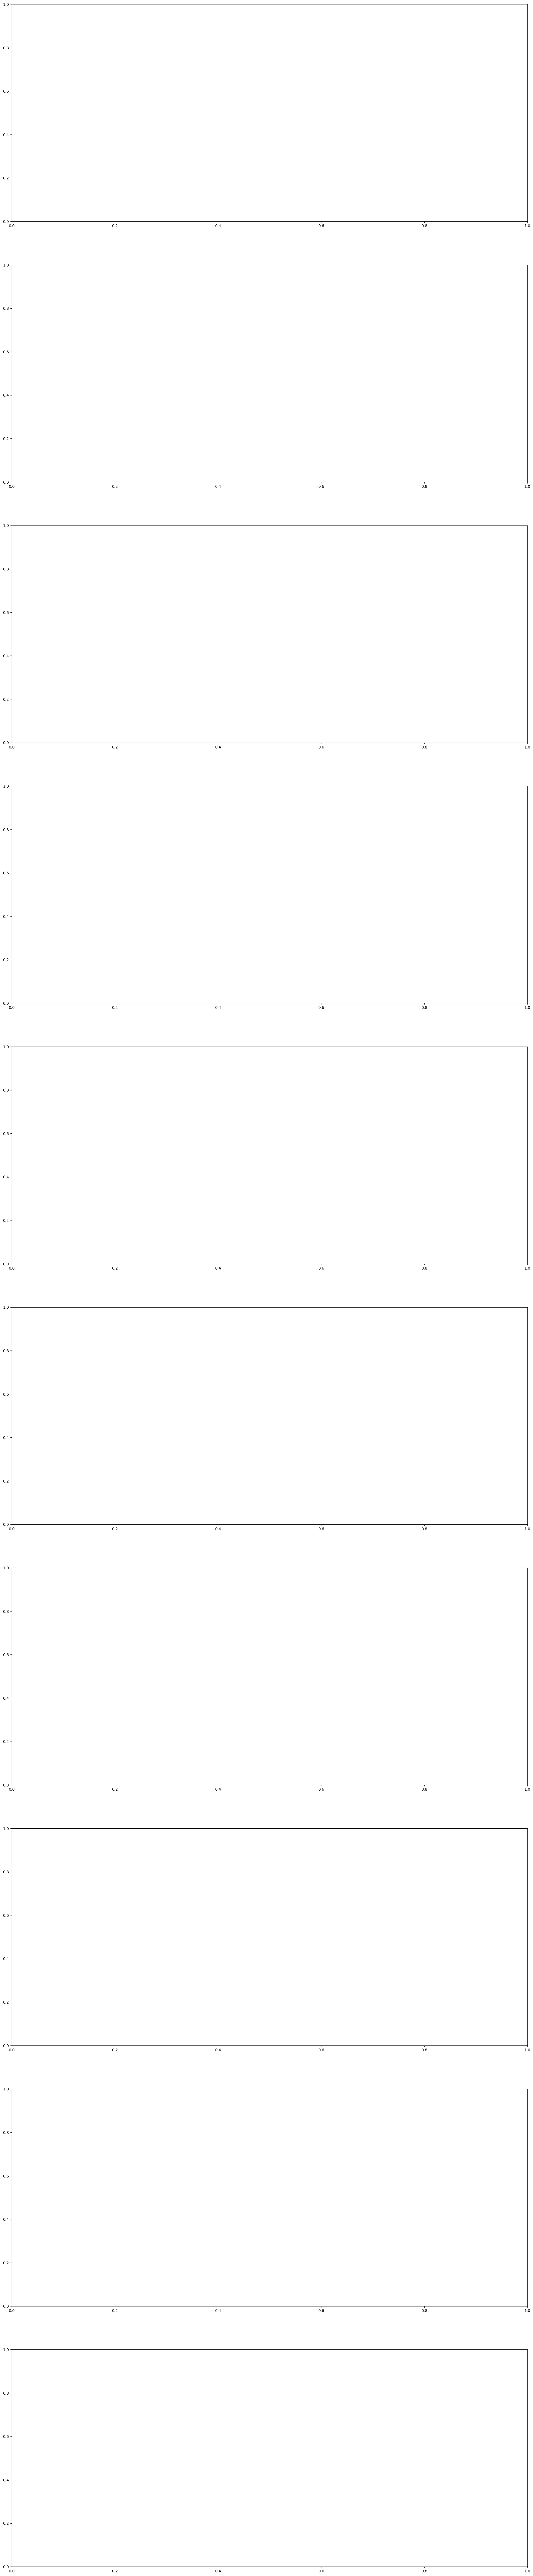

In [ ]:
figure, axes = plt.subplots(10, 1, figsize=(24, 120))
nx.draw_networkx(graph_2011_filtered, with_labels=True, ax=axes[0])
nx.draw_networkx(graph_2012_filtered, with_labels=True, ax=axes[1])
nx.draw_networkx(graph_2013_filtered, with_labels=True, ax=axes[2])
nx.draw_networkx(graph_2014_filtered, with_labels=True, ax=axes[3])
nx.draw_networkx(graph_2015_filtered, with_labels=True, ax=axes[4])
nx.draw_networkx(graph_2016_filtered, with_labels=True, ax=axes[5])
nx.draw_networkx(graph_2017_filtered, with_labels=True, ax=axes[6])
nx.draw_networkx(graph_2018_filtered, with_labels=True, ax=axes[7])
nx.draw_networkx(graph_2019_filtered, with_labels=True, ax=axes[8])
nx.draw_networkx(graph_2020_filtered, with_labels=True, ax=axes[9])

On plotting the graphs, we see that the network looks different every year, and no two yearwise graphs look very similar.

## Computing Graph Statistics over Time

In [ ]:
average_degree_connectivity = []
average_shortest_path_length = []
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

for graph in [graph_2011_filtered, graph_2012_filtered, graph_2013_filtered, graph_2014_filtered, graph_2015_filtered, 
             graph_2016_filtered, graph_2017_filtered, graph_2018_filtered, graph_2019_filtered, graph_2020_filtered]:
    average_shortest_path_length.append(nx.average_shortest_path_length(graph))

In [ ]:
figure = plt.figure(figsize=(22, 8))
sns.lineplot(x='year', y='average_shortest_path_length', 
             data=pd.DataFrame({'year': year, 'average_shortest_path_length': average_shortest_path_length}));

From the above plot, we can see that the shortest path length was more stable till 2015 but there was significant increment in 2016 and 2017 and again there was a decrement in 2018. In 2020, there was an increment again. Maybe, this has some correlation with finacial queries.

## Portfolio Construction

In [ ]:
log_returns_2011_till_2020 = np.log(price_data_cleaned.shift(1)) - np.log(price_data_cleaned)
return_correlation_2011_till_2020 = log_returns_2011_till_2020.corr()

In [ ]:
figure = plt.figure(figsize=(24, 8))
sns.heatmap(return_correlation_2011_till_2020);

In [ ]:
distance_2011_till_2020 = np.sqrt(2 * (1 - return_correlation_2011_till_2020))
distance_2011_till_2020_graph = nx.Graph(distance_2011_till_2020)
distance_2011_till_2020_graph_filtered = nx.minimum_spanning_tree(distance_2011_till_2020_graph)

In [ ]:
figure = plt.figure(figsize=(24, 8))
nx.draw_kamada_kawai(distance_2011_till_2020_graph_filtered, with_labels=True)

In [ ]:
degree_centrality = nx.degree_centrality(distance_2011_till_2020_graph_filtered)
closeness_centrality = nx.closeness_centrality(distance_2011_till_2020_graph_filtered)
betweenness_centrality = nx.betweenness_centrality(distance_2011_till_2020_graph_filtered)
eigenvector_centrality=nx.eigenvector_centrality_numpy(distance_2011_till_2020_graph_filtered)

In [ ]:
keys = []
values = []

for key, value in degree_centrality.items():
    keys.append(key)
    values.append(value)

dc_data = pd.DataFrame({'stocks': keys, 'degree_centrality': values}).sort_values('degree_centrality', ascending=False)
px.bar(data_frame=dc_data, x='stocks', y='degree_centrality', template='plotly_dark')

**Degree centrality** is the simplest centrality measure. It defines the relative significance of a stock in terms of the **number of edges incident upon it.** The stocks with the high scores will influence the behavio of many other stocks which are directly connected to it.

Based on this measure, **HON has the highest number of edges with other stocks and hence the highest degree centrality.**

In [ ]:
keys = []
values = []

for key, value in closeness_centrality.items():
    keys.append(key)
    values.append(value)

cc_data = pd.DataFrame({'stocks': keys, 'closeness_centrality': values}).sort_values('closeness_centrality', 
                                                                                       ascending=False)
px.bar(data_frame=cc_data, x='stocks', y='closeness_centrality', template='plotly_dark')

**Closeness centrality** also involves the shortest path between all possible pairs of stocks on a network.

It is defined as the average number of shortest paths between a stock and all the other stocks reachable from it.

In [ ]:
keys = []
values = []

for key, value in betweenness_centrality.items():
    keys.append(key)
    values.append(value)

bc_data = pd.DataFrame({'stocks': keys, 'betweenness_centrality': values}).sort_values('betweenness_centrality', 
                                                                                       ascending=False)
px.bar(data_frame=bc_data, x='stocks', y='betweenness_centrality', template='plotly_dark')

**Betweenness centrality** is the sum of the fraction of all possible shortest paths between any stocks that pass through a stock. It is used to **quantify the control of a stock on information flow in the network.**

Therefore, the stock the highest score is considered a significant stock in terms of its role in coordinating the information among stocks.

## Selecting Stocks based on Network Topological Parameters

In [ ]:
# we already computed degree centrality above

# we already computed betweenness centrality above

# distance on degree criterion
distance_degree_criteria = {}
node_with_largest_degree_centrality = max(dict(degree_centrality), key=dict(degree_centrality).get)
for node in distance_2011_till_2020_graph_filtered.nodes():
    distance_degree_criteria[node] = nx.shortest_path_length(distance_2011_till_2020_graph_filtered, node, 
                                                             node_with_largest_degree_centrality)

# distance on correlation criterion
distance_correlation_criteria = {}
sum_correlation = {}

for node in distance_2011_till_2020_graph_filtered.nodes():
    neighbors = nx.neighbors(distance_2011_till_2020_graph_filtered, node)
    sum_correlation[node] = sum(return_correlation_2011_till_2020[node][neighbor] for neighbor in neighbors)

node_with_highest_correlation = max(sum_correlation, key=sum_correlation.get)
    
for node in distance_2011_till_2020_graph_filtered.nodes():
    distance_correlation_criteria[node] = nx.shortest_path_length(distance_2011_till_2020_graph_filtered, node, 
                                                             node_with_highest_correlation)    

# distance on distance criterion
distance_distance_criteria = {}
mean_distance = {}

for node in distance_2011_till_2020_graph_filtered.nodes():
    nodes = list(distance_2011_till_2020_graph_filtered.nodes())
    nodes.remove(node)
    distance_distance = [nx.shortest_path_length(distance_2011_till_2020_graph_filtered, node, ns) for ns in nodes]
    mean_distance[node] = np.mean(distance_distance)
    
node_with_minimum_mean_distance = min(mean_distance, key=mean_distance.get)

for node in distance_2011_till_2020_graph_filtered.nodes():
    distance_distance_criteria[node] = nx.shortest_path_length(distance_2011_till_2020_graph_filtered, node, 
                                                             node_with_minimum_mean_distance)

**Distance refers to the smallest length from a node to the central node of the network.**

Here, three types of definitions of central node are introduced to reduce the error caused by a single method.

Therefore three types of distances are described here.

**1. Distance on degree criterion** (Ddegree). the central node is the one that has the largest degree.

**2. Distance on correlation criterion** (Dcorrelation), the central node is the one with the highest value of the sum correlation coefficients with its neighbors.

**3. Distance on distance criterion** (Ddistance), the central node is the one that produces the lowest value for the mean distance.

In [ ]:
node_stats = pd.DataFrame.from_dict(dict(degree_centrality), orient='index')
node_stats.columns = ['degree_centrality']
node_stats['betweenness_centrality'] = betweenness_centrality.values()

node_stats['average_centrality'] = 0.5 * (node_stats['degree_centrality'] + node_stats['betweenness_centrality'])

node_stats['distance_degree_criteria'] = distance_degree_criteria.values()
node_stats['distance_correlation_criteria'] = distance_correlation_criteria.values()
node_stats['distance_distance_criteria'] = distance_distance_criteria.values()
node_stats['average_distance'] = (node_stats['distance_degree_criteria'] + node_stats['distance_correlation_criteria'] + node_stats['distance_distance_criteria']) / 3

NameError: ignored

In [ ]:
node_stats.head()

We use the parameters defined above to select the portfolios.

**The nodes with the largest 10% of degree or betweenness centrality are chosen to be in the central portfolio.**

**The nodes whose degree equals to 1 or betweenness centrality equals to 0 are chosen to be in the peripheral portfolio.**

Similarly, we define the node's ranking in the top 10% of distance as the stocks of the peripheral portfolios, and the bottom 10% as the stocks of the central portfolios.

The central portfolios and peripheral portfolios represent two opposite sides of correlation and agglomeration. Generally speaking, central stocks play a vital role in the market and impose a strong influence on other stocks. On the other hand, the correlations between peripheral stocks are weak and contain much more noise than those of the central stocks. 

In [ ]:
central_stocks = node_stats.sort_values('average_centrality', ascending=False).head(15)
central_portfolio = [stock for stock in central_stocks.index.values]

NameError: ignored

In [ ]:
peripheral_stocks = node_stats.sort_values('average_distance', ascending=False).head(15)
peripheral_portfolio = [stock for stock in peripheral_stocks.index.values]

NameError: ignored

In [ ]:
central_stocks

NameError: ignored

In [ ]:
peripheral_stocks

### Selecting the top 15 stocks for both Central Stocks and Peripheral Stocks

In [ ]:
color = []

for node in distance_2011_till_2020_graph_filtered:
    if node in central_portfolio:
        color.append('red')
        
    elif node in peripheral_portfolio:
        color.append('green')
        
    else:
        color.append('blue')

NameError: ignored

In [ ]:
figure = plt.figure(figsize=(24, 8))
nx.draw_kamada_kawai(distance_2011_till_2020_graph_filtered, with_labels=False, node_color=color)

NameError: ignored

<Figure size 2400x800 with 0 Axes>

Here, **the red stocks are the central portfolio stocks, and the green ones are the peripheral portfolio stocks.**

# Performance Evalution

Here we evaluate the performance of the stocks by comparing the performance of the Central Portfolio, Peripheral and S&P 500 Stocks in 2021, and **finding out which portfolio performs the best.**

In [ ]:
# collecting data for all S&P 500 components for the year 2021
# %time price_data_2021 = web.DataReader(tickers, 'yahoo', start='2021-01-01', end='2021-12-31')

In [ ]:
# Reading data for 2021 S&P 500 stocks:
price_data_2021 = pd.read_csv('snp500_price_data_2021.csv', index_col=[0])
#price_data_2021 = price_data_2021['Adj Close']
#price_data_2021.to_csv('snp500_price_data_2021.csv')

FileNotFoundError: ignored

In [ ]:
price_data_2021.head()

In [ ]:
snp_500_2021 = web.DataReader(['sp500'], 'fred', start='2021-01-01', end='2021-12-31')

In [ ]:
price_data_2021.head()

In [ ]:
# Removing NA values:
price_data_2021 = price_data_2021.dropna(axis=1)
snp_500_2021 = snp_500_2021.dropna()

NameError: ignored

In [ ]:
price_data_2021.head()

NameError: ignored

In [ ]:
price_data_2021 = price_data_2021['2021-01-04':]

NameError: ignored

In [ ]:
amount = 100000

central_portfolio_value = pd.DataFrame()
for stock in central_portfolio:
    central_portfolio_value[stock] = price_data_2021[stock]

portfolio_unit = central_portfolio_value.sum(axis=1)[0]
share = amount / portfolio_unit
central_portfolio_value = central_portfolio_value.sum(axis=1) * share

peripheral_portfolio_value = pd.DataFrame()
for stock in peripheral_portfolio:
    peripheral_portfolio_value[stock] = price_data_2021[stock]

portfolio_unit = peripheral_portfolio_value.sum(axis=1)[0]
share = amount / portfolio_unit
peripheral_portfolio_value = peripheral_portfolio_value.sum(axis=1) * share

NameError: ignored

In [ ]:
snp_500_2021_value = snp_500_2021 * (amount / snp_500_2021.iloc[0])

In [ ]:
all_portfolios = snp_500_2021_value
all_portfolios['central_portfolio'] = central_portfolio_value.values
all_portfolios['peripheral_portfolio'] = peripheral_portfolio_value.values

In [ ]:
# all_portfolios = pd.concat([snp_500_2021_value, central_portfolio_value, peripheral_portfolio_value], axis=1)
# all_portfolios.columns = ['snp500', 'central_portfolio', 'peripheral_portfolio']

In [ ]:
all_portfolios.head()

NameError: ignored

NameError: ignored

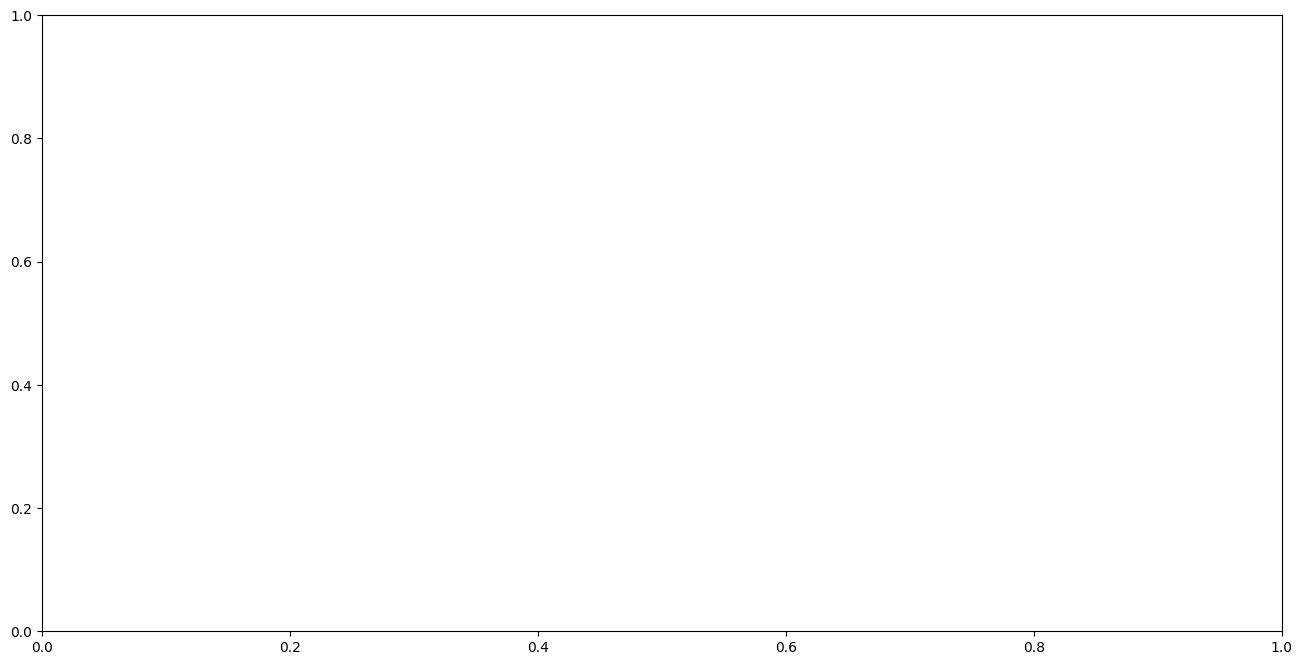

In [ ]:
figure, ax = plt.subplots(figsize=(16, 8))
snp_500_line = ax.plot(all_portfolios['sp500'], label='S&P 500')
central_portfolio_line = ax.plot(all_portfolios['central_portfolio'], label= 'Central Portfolio')
peripheral_portfoli_line = ax.plot(all_portfolios['peripheral_portfolio'], label= 'Peripheral Portfolio')
ax.legend(loc='upper left')
plt.show()

As seen from the above plot, it is clear that **the Central Portfolio stocks perform better and the Peripheral Portfolio stocks perform poorer in comparision to the S&P 500 stocks in 2021.**

Both the portfolios have their features under different market conditions. 

Generally, **in stable market conditions Central Portfolio Stocks will perform better whereas Peripheral Portfolio Stocks will perform better in crisis market conditions.** This is due to peripheral portfolio stocks are kind of having a weak correlation so they will not be impacted by all other stocks were present in out network.

We can rebalance our stocks portfolio by using the network analysis.